## Group Project Collaboration Sheet

This Jupyter Notebook will be used by **GROUP 2** to collaborate on the group assessement for week 6.




## Assignment Brief: Airbnb business analysis using a data science approach

### Background
Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present more unique, personalised ways of experiencing the world. The Airbnb dataset ([AB_NYC_2019.csv](https://nam11.safelinks.protection.outlook.com/?url=https%3A%2F%2Fwww.kaggle.com%2Fcode%2Fwhyalwaysme%2Fab-nyc-2019&data=05%7C02%7Cvle-kol%40kaplan.com%7C28aee75828b3473747d408dc43625d53%7C057daf85b1d544cdab7b0a4ce1b29eae%7C0%7C0%7C638459336958978960%7CUnknown%7CTWFpbGZsb3d8eyJWIjoiMC4wLjAwMDAiLCJQIjoiV2luMzIiLCJBTiI6Ik1haWwiLCJXVCI6Mn0%3D%7C0%7C%7C%7C&sdata=jK3zdVNF04Rn%2BZ2NyZn9ylwtVS8fMw%2FAIuo%2BTg5b2g0%3D&reserved=0)) along with its description can be accessed through [Kaggle](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data). This dataset describes the listing activity and metrics in NYC, NY for 2019, which includes all needed information about hosts, geographical availability, and necessary metrics to make predictions and draw conclusions.

This assignment is aimed at assessing your ability to pose interesting questions relevant to Airbnb business, process the data using the key steps of big data analytics, such as, data pre-processing, analysing, and eventually preparing an analytical report. In order for your analysis to be compelling, it must address a substantive issue rather than a trivial one.

### Task 1 (Business Analytic Question)
Propose an interesting business analytic question that can be answered using the given Airbnb dataset. The proposed question should be useful for Airbnb. An example question could be: is there any noticeable difference in bookings among different areas and what could be the reasons for it?

### Task 2 (Data Analysis)
In this task, use your data analytics skills to answer the question posed in the Task 1. Depending upon your chosen question, you will typically have to perform Exploratory Data Analysis (EDA), data pre-processing, statistics-based data analysis, data visualisation and use unsupervised machine learning algorithms (e.g., clustering).

### Task 3 (Analytical Report)
In this task, you are expected to prepare a 1000 word analytical report, which can easily be interpreted by the executive board members of the Airbnb. There is no fixed specification for this report but in general, it must contain an adequate number of visualisation charts/graphs with a lucid description.

### Additional Information

This assignment has two parts, the team submission, and your individual peer assessment. All components must be submitted by end of unit 6. This assessment accounts for 20% of your final module mark.

Only one submission is required from each team with a limit of 1000 words for the analytical report. This word count applies only to the main content of your work excluding the following: images, list of references, table of contents, appendices, etc. All artefacts produced as part of this submission should be stored in your e-portfolio, due for submission in Unit 12.

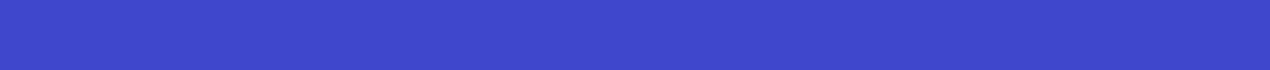

###**Task 1**

### Introduction
This report aims to provide Airbnb with analytical insights into their New York City operations by examining historical data from 2019 using the AB_NYC_2019 dataset (Kaggle, 2019). It outlines the formulation of a business analytics question, the data analysis process, and the resulting analytical findings.

Airbnb is an online platform that connects travelers with hosts, offering a variety of stays, experiences, and adventures. From charming homes to guided activities by local experts, it caters to both leisure and business travelers. With secure payments, verified profiles, 24/7 support, and AirCover protection for hosts, Airbnb prioritizes safety and convenience for its community (AirBnB, 2025a). Airbnb deducts a service fee from each booking, which is automatically taken from the host’s payout. Most hosts pay a 3% split fee, where the cost is shared with guests, who usually contribute less than 14.2% of the booking subtotal. Alternatively, some hosts choose a host-only fee of 14% to 16%, which applies to hotels, serviced apartments, and those using property management software (AirBnB, 2025b).

For Airbnb, identifying the most promising areas for apartment rentals is crucial, as each booking contributes to their revenue. The more hosts list and successfully rent out their properties, the more Airbnb benefits financially. Understanding variations in booking demand and pricing across different neighborhoods and the factors influencing these differences can help hosts optimize their listings, ultimately increasing their earnings while also boosting Airbnb’s revenue.

To explore this, we will address the following analytics question:
**"Which areas in New York City attract the most Airbnb bookings, what are the mean prices for each area, and what factors contribute to their popularity?"**

### **Task 2**


### 1. Let's take a look at the dataset
First we take a look at the dataset. For this step we have to import the dataset. I used the AB-NYC-2019 provided by Kaggle (2019).

In [40]:
# Use this code to import the libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from folium import DivIcon

In [41]:
# Use this step to upload the file directly. You may download it from our share and then simply use this to upload it by browsing for the file
# Upload the file using the widget
uploaded = files.upload()

# Change file to data
file_name = next(iter(uploaded))
data = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving AB_NYC_2019.csv to AB_NYC_2019 (1).csv


In [44]:
# Now we can check out the data by looking at the header
print(data.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [45]:
# We can now take a closer look at the data by listing all field names, the number of fields and the number of data entries

print("The field name of data: ", data.columns)
print("Number of fields in data: ", len(data.columns))
print("Number of data in data: ", len(data))

The field name of data:  Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
Number of fields in data:  16
Number of data in data:  48895


In [47]:
# If we want to simply print the data we can use the data command
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### 2. Pre-Processing
We start by pre-processing the data. This means we will look for empty values, fill them or remove them from the dataset to clean it up. We will also remove outliers during this process

In [48]:
# The info function will show us the field properties. We can see taht we have 48895 entries.
# We can also see that the Non-Null count is different for name, host_name, last_review and reviews_per_month.
# This indicates that we have some empty values there.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [49]:
# Check the number of nulls in each field which we already noticed in the step above.
# The data shows how many are missing per label
data.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [50]:
# This code assigns 0 to reviews_per_month and last_review for listings with number_of_reviews 0
data.loc[data.number_of_reviews==0, 'reviews_per_month'] = 0
data.loc[data.number_of_reviews==0, 'last_review'] = 0

In [51]:
# We continue by removing the entries where name and host_name are null values
data = data[pd.notnull(data['name'])]
data = data[pd.notnull(data['host_name'])]

In [52]:
# We check again how many empty entries we have which should now result in zero empty entries
data.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [53]:
# Now that we don't have any null values anymore we can continue by checking the data for outliers
# This can be done by looking at the range of data
ranges = data.select_dtypes(include=['number', 'float']).agg(['min', 'max'])
ranges.loc['range'] = ranges.loc['max'] - ranges.loc['min']
print(ranges)

               id      host_id  latitude  longitude    price  minimum_nights  \
min        2539.0       2438.0  40.49979  -74.24442      0.0             1.0   
max    36487245.0  274321313.0  40.91306  -73.71299  10000.0          1250.0   
range  36484706.0  274318875.0   0.41327    0.53143  10000.0          1249.0   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
min                  0.0                0.0                             1.0   
max                629.0               58.5                           327.0   
range              629.0               58.5                           326.0   

       availability_365  
min                 0.0  
max               365.0  
range             365.0  


In [54]:
# Looking at the range we can ignore id and host_id as those are irrelevant from an outlier perspective
# Latitude and longtitude have a small range which indicates that there are no outliers which is good as we want to focus on the area
# Price, minimum_nights, number of reviews, reviews per month, calculated host listings count and availability 365 have large ranges
# Out of the ones with large ranges we will start by looking at price as it is one of the more interesting ones as our analytics question focuses on this part
# Let's take a look at the mean price next
np.mean(data.price)

152.74030864955586

(array([3.908e+04, 7.791e+03, 1.128e+03, 3.850e+02, 1.760e+02, 9.100e+01,
        3.400e+01, 3.700e+01, 1.700e+01, 9.000e+00, 2.700e+01, 5.000e+00,
        1.400e+01, 4.000e+00, 7.000e+00, 8.000e+00, 2.000e+00, 2.000e+00,
        4.000e+00, 2.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 7.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 6.000e+00]),
 array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.,  1400.,
         1600.,  1800.,  2000.,  2200.,  2400.,  2600.,  2800.,  3000.,
         3200.,  3400.,  3600.,  3800.,  4000.,  4200.,  4400.,  4600.,
         4800.,  5000.,  5200.,  5400.,  5600.,  5800.,  6000.,  6200.,
         6400.,  6600.,  6800.,  7000.,  7200.,  7400.,  7600.,  7800.,
         8000., 

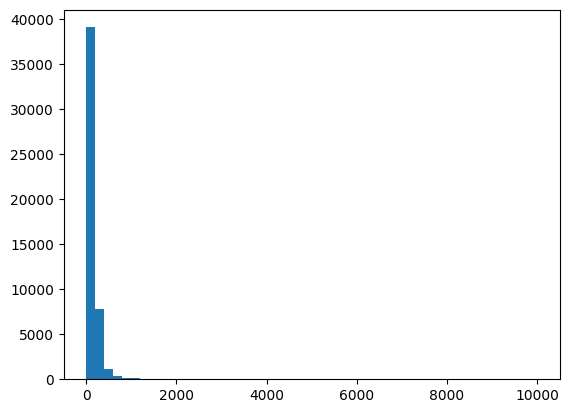

In [55]:
# Let's take a closer look and plot the prices to see if we are facing outliers
plt.hist(data.price, bins=50)

In [56]:
# As we could observe that most prices are below 2000 maybe even below 1500 we will quickly check how many are at what point
# Testing with 2000 -> 86
# Testing with 1500 -> 139
# Testing with 1300 -> 181
# Testing with 1000 -> 239
# Testing with 1000 -> 420

len(data[data.price > 800])

# We think taking 800 is a good value as 420 out of over 48'000 total entries are larger than 800 meaning they are in the top 1%.

420

In [57]:
# Let's adjust our dataset to only include the ones where price is <= 800
data = data[data.price <= 800]

(array([4.200e+01, 6.620e+02, 3.770e+03, 5.881e+03, 5.457e+03, 5.015e+03,
        4.650e+03, 3.325e+03, 2.344e+03, 3.323e+03, 2.222e+03, 1.539e+03,
        2.366e+03, 7.100e+02, 9.180e+02, 1.493e+03, 3.180e+02, 4.880e+02,
        9.950e+02, 1.380e+02, 2.390e+02, 5.080e+02, 8.000e+01, 1.810e+02,
        2.070e+02, 2.570e+02, 9.400e+01, 2.800e+01, 1.910e+02, 5.200e+01,
        6.200e+01, 2.680e+02, 2.500e+01, 1.400e+01, 6.300e+01, 1.900e+01,
        2.300e+01, 1.130e+02, 7.000e+00, 5.000e+00, 6.700e+01, 3.000e+00,
        1.600e+01, 9.100e+01, 1.300e+01, 2.000e+00, 6.600e+01, 3.000e+00,
        1.000e+00, 8.400e+01]),
 array([  0.,  16.,  32.,  48.,  64.,  80.,  96., 112., 128., 144., 160.,
        176., 192., 208., 224., 240., 256., 272., 288., 304., 320., 336.,
        352., 368., 384., 400., 416., 432., 448., 464., 480., 496., 512.,
        528., 544., 560., 576., 592., 608., 624., 640., 656., 672., 688.,
        704., 720., 736., 752., 768., 784., 800.]),
 <BarContainer object of 50 

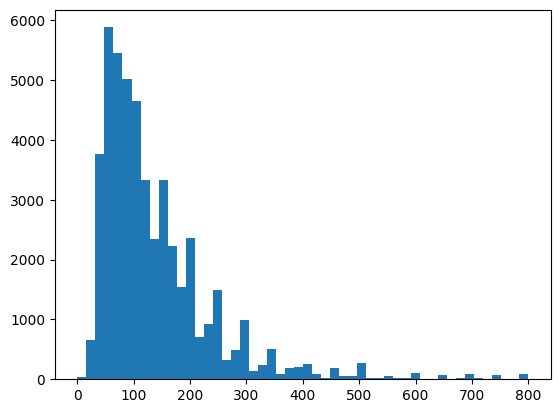

In [58]:
# Let's again plot the chart
plt.hist(data.price, bins=50)

(array([4.3426e+04, 4.5810e+03, 1.3400e+02, 1.3300e+02, 3.3000e+01,
        9.0000e+00, 4.0000e+00, 5.3000e+01, 4.0000e+00, 4.0000e+00,
        4.0000e+00, 7.0000e+00, 0.0000e+00, 0.0000e+00, 3.5000e+01,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 2.59800e+01, 5.09600e+01, 7.59400e+01, 1.00920e+02,
        1.25900e+02, 1.50880e+02, 1.75860e+02, 2.00840e+02, 2.25820e+02,
        2.50800e+02, 2.75780e+02, 3.00760e+02, 3.25740e+02, 3.50720e+02,
        3.75700e+02, 4.00680e+02, 4.25660e+02, 4.50640e+02, 4.75620e+02,
        5.00600e+02, 5.255

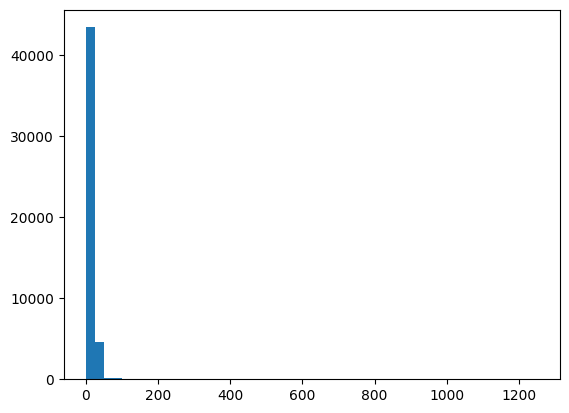

In [59]:
# Let's take a closer look at the minimum_nights to see if we are facing outliers
plt.hist(data.minimum_nights, bins=50)

In [60]:
# Again it seems like we are facing outliers. Let's check where to cut:
# Testing with 250 -> 53
# Testing with 300 -> 42
# Testing with 150 -> 118
# Testing with 100 -> 160
# Testing with 75 -> 293
# Testing with 50 -> 427

len(data[data.minimum_nights > 50])

431

In [61]:
# Let's remove those where minimum night is below 50
data = data[data.minimum_nights < 50]

(array([1.254e+04, 1.163e+04, 7.940e+03, 3.272e+03, 3.020e+03, 7.460e+02,
        2.041e+03, 1.300e+02, 8.000e+01, 4.780e+02, 3.200e+01, 9.100e+01,
        0.000e+00, 5.400e+01, 5.600e+02, 2.780e+02, 1.800e+01, 1.400e+01,
        2.800e+01, 8.000e+00, 2.210e+02, 1.340e+02, 8.000e+00, 7.000e+00,
        0.000e+00, 1.400e+01, 8.200e+01, 1.600e+01, 1.700e+01, 2.030e+02,
        3.400e+02, 3.718e+03, 1.980e+02, 8.000e+00, 2.000e+00, 0.000e+00,
        1.400e+01, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.100e+01, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 3.200e+01,
        0.000e+00, 2.000e+00]),
 array([ 1.  ,  1.92,  2.84,  3.76,  4.68,  5.6 ,  6.52,  7.44,  8.36,
         9.28, 10.2 , 11.12, 12.04, 12.96, 13.88, 14.8 , 15.72, 16.64,
        17.56, 18.48, 19.4 , 20.32, 21.24, 22.16, 23.08, 24.  , 24.92,
        25.84, 26.76, 27.68, 28.6 , 29.52, 30.44, 31.36, 32.28, 33.2 ,
        34.12, 35.04, 35.96, 36.88, 37.8 , 38.72, 39.64, 40.56, 41.48,
        42.4 , 43.32,

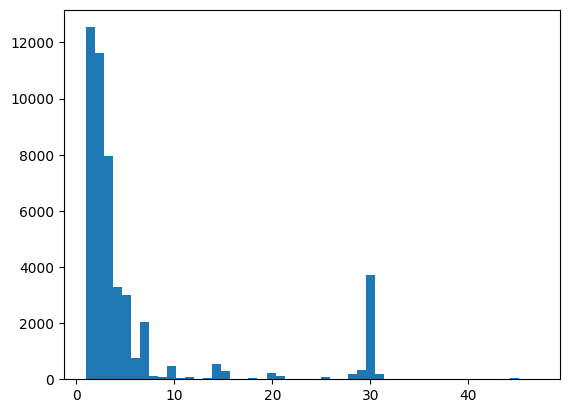

In [62]:
# Let's check again
plt.hist(data.minimum_nights, bins=50)

(array([3.1048e+04, 5.4240e+03, 2.6920e+03, 1.9130e+03, 1.3520e+03,
        1.1150e+03, 8.4700e+02, 6.2400e+02, 5.2900e+02, 4.3600e+02,
        3.9300e+02, 2.8400e+02, 2.3500e+02, 1.9100e+02, 1.5300e+02,
        1.3400e+02, 1.3300e+02, 9.5000e+01, 8.5000e+01, 5.2000e+01,
        4.4000e+01, 3.7000e+01, 2.7000e+01, 2.0000e+01, 1.3000e+01,
        2.6000e+01, 1.3000e+01, 1.0000e+01, 1.1000e+01, 7.0000e+00,
        6.0000e+00, 8.0000e+00, 8.0000e+00, 4.0000e+00, 5.0000e+00,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  0.  ,  12.58,  25.16,  37.74,  50.32,  62.9 ,  75.48,  88.06,
        100.64, 113.22, 125.8 , 138.38, 150.96, 163.54, 176.12, 188.7 ,
        201.28, 213.86, 226.44, 239.02, 251.6 , 264.18, 276.76, 289.34,
        301.92, 314.5 , 327.08, 339.66, 352.24, 364.82, 377.4 , 389.98,
        402.56, 415.14, 427.72

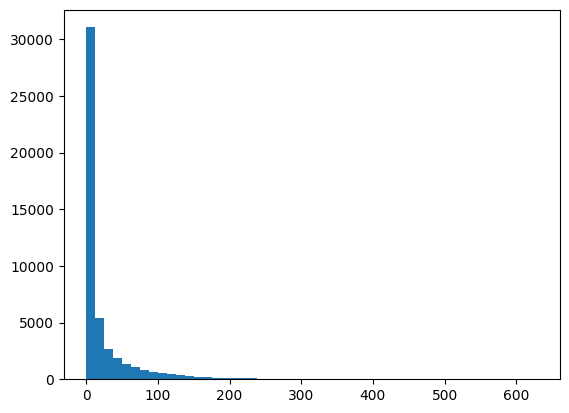

In [63]:
# Now we can also do the same for the other fields
# Looking at the distribution
plt.hist(data.number_of_reviews, bins=50)

In [64]:
# Finding where outliers appear

len(data[data.number_of_reviews > 250])

263

In [65]:
# Remove the data that are outliers
data = data[data.number_of_reviews < 250]

(array([2.2661e+04, 6.1600e+03, 3.4000e+03, 2.2500e+03, 1.6890e+03,
        1.3500e+03, 1.0820e+03, 9.4000e+02, 7.4500e+02, 6.7800e+02,
        6.3000e+02, 5.5100e+02, 4.7800e+02, 4.3600e+02, 4.1400e+02,
        3.7700e+02, 2.9300e+02, 3.1500e+02, 2.8500e+02, 2.3200e+02,
        2.3300e+02, 2.2200e+02, 1.5600e+02, 1.9900e+02, 1.7200e+02,
        1.4300e+02, 1.6500e+02, 1.3700e+02, 1.1400e+02, 1.2500e+02,
        1.1700e+02, 7.7000e+01, 7.7000e+01, 8.6000e+01, 6.7000e+01,
        7.6000e+01, 5.3000e+01, 5.9000e+01, 5.8000e+01, 4.8000e+01,
        5.7000e+01, 6.2000e+01, 4.7000e+01, 3.0000e+01, 3.7000e+01,
        4.4000e+01, 3.3000e+01, 2.3000e+01, 2.4000e+01, 2.2000e+01]),
 array([  0.  ,   4.98,   9.96,  14.94,  19.92,  24.9 ,  29.88,  34.86,
         39.84,  44.82,  49.8 ,  54.78,  59.76,  64.74,  69.72,  74.7 ,
         79.68,  84.66,  89.64,  94.62,  99.6 , 104.58, 109.56, 114.54,
        119.52, 124.5 , 129.48, 134.46, 139.44, 144.42, 149.4 , 154.38,
        159.36, 164.34, 169.32

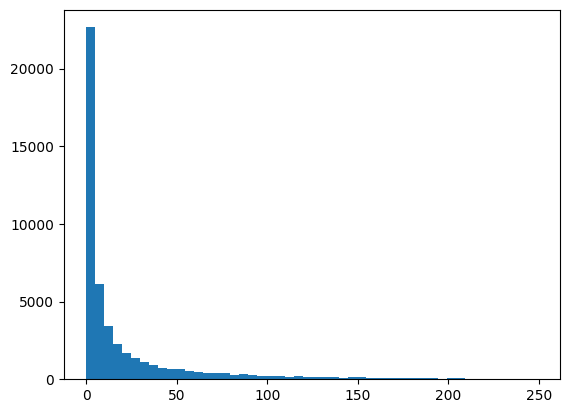

In [66]:
# Check again
plt.hist(data.number_of_reviews, bins=50)

(array([4.3987e+04, 1.3100e+03, 2.5500e+02, 1.9300e+02, 3.0100e+02,
        1.4300e+02, 4.3000e+01, 2.9500e+02, 0.0000e+00, 6.2000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7700e+02, 1.9200e+02,
        1.0300e+02, 0.0000e+00, 0.0000e+00, 1.1700e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.2400e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.2700e+02]),
 array([  1.  ,   7.52,  14.04,  20.56,  27.08,  33.6 ,  40.12,  46.64,
         53.16,  59.68,  66.2 ,  72.72,  79.24,  85.76,  92.28,  98.8 ,
        105.32, 111.84, 118.36, 124.88, 131.4 , 137.92, 144.44, 150.96,
        157.48, 164.  , 170.52, 177.04, 183.56, 190.08, 196.6 , 203.12,
        209.64, 216.16, 222.68

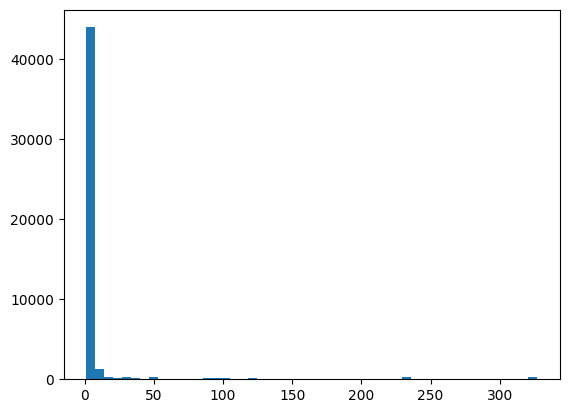

In [67]:
# The calculated_host_listings_count looks good already:
plt.hist(data.calculated_host_listings_count, bins=50)

(array([19304.,  1258.,   948.,   895.,   880.,   703.,   683.,   606.,
          608.,   644.,   676.,   790.,   988.,   426.,   278.,   281.,
          325.,   429.,   321.,   307.,   379.,   549.,   392.,   516.,
          805.,   541.,   298.,   245.,   258.,   281.,   371.,   278.,
          315.,   420.,   461.,   345.,   472.,   339.,   538.,   315.,
          437.,   407.,   686.,   576.,   615.,   761.,  1017.,   617.,
          625.,  2520.]),
 array([  0. ,   7.3,  14.6,  21.9,  29.2,  36.5,  43.8,  51.1,  58.4,
         65.7,  73. ,  80.3,  87.6,  94.9, 102.2, 109.5, 116.8, 124.1,
        131.4, 138.7, 146. , 153.3, 160.6, 167.9, 175.2, 182.5, 189.8,
        197.1, 204.4, 211.7, 219. , 226.3, 233.6, 240.9, 248.2, 255.5,
        262.8, 270.1, 277.4, 284.7, 292. , 299.3, 306.6, 313.9, 321.2,
        328.5, 335.8, 343.1, 350.4, 357.7, 365. ]),
 <BarContainer object of 50 artists>)

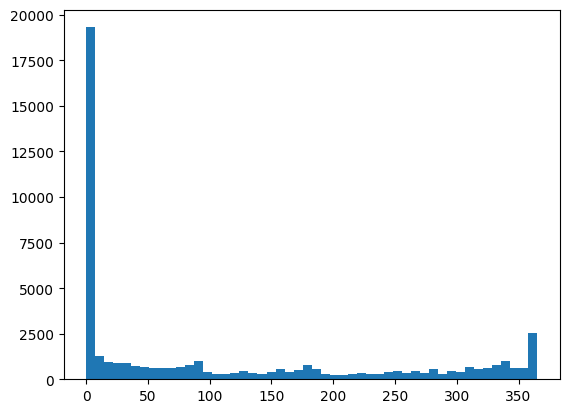

In [68]:
# The availability_365_count looks good already:
plt.hist(data.availability_365, bins=50)

In [69]:
# Let's check what is left after pre-processing the data by removing outliers
len(data)

47729

### 3. Further exploring the data
We are now further exploring the data we cleansed earlier.

In [70]:
# What neighbour hood has the most hosts?
a=data.groupby(by=['neighbourhood']).neighbourhood.count()
a = a.sort_values(ascending=False)
print(a)

neighbourhood
Williamsburg          3848
Bedford-Stuyvesant    3655
Harlem                2599
Bushwick              2434
Hell's Kitchen        1912
                      ... 
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Woodrow                  1
Name: neighbourhood, Length: 221, dtype: int64


In [71]:
# Which neighbour hood is the most expensive one?
a=data.groupby(by=['neighbourhood']).price.mean()
a = a.sort_values(ascending=False)
print(a)

neighbourhood
Fort Wadsworth    800.000000
Woodrow           700.000000
Tribeca           297.089744
NoHo              276.246753
Neponsit          274.666667
                     ...    
New Dorp           57.000000
Soundview          53.466667
Tremont            51.545455
Hunts Point        50.500000
Bull's Head        47.333333
Name: price, Length: 221, dtype: float64


In [72]:
# What room types are available?
a=data.groupby(by=['room_type']).room_type.count()
a = a.sort_values(ascending=False)
print(a)

room_type
Entire home/apt    24669
Private room       21918
Shared room         1142
Name: room_type, dtype: int64


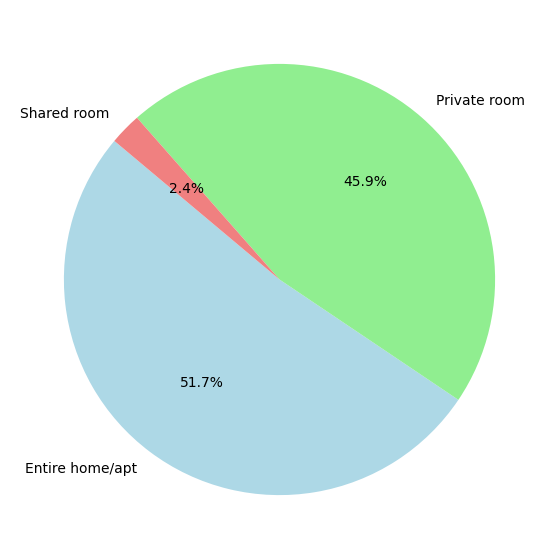

In [73]:
# Let's create a pie chart
room_type_counts = data['room_type'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
plt.show()

In [74]:
# Which is the largest neighbourhood group
a=data.groupby(by=['neighbourhood_group']).neighbourhood_group.count()
a = a.sort_values(ascending=False)
print(a)

neighbourhood_group
Manhattan        20977
Brooklyn         19758
Queens            5557
Bronx             1069
Staten Island      368
Name: neighbourhood_group, dtype: int64


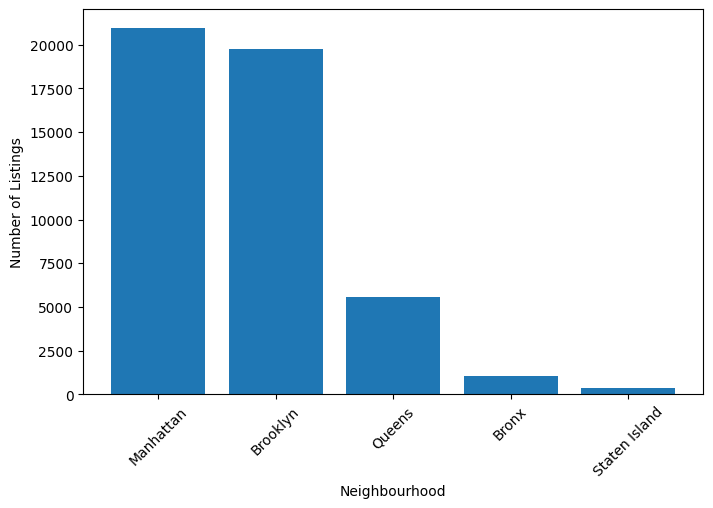

In [75]:
# This could be intersting for later analysis. Let's dive deeper by creating a barchart to see where the most listings are located:
# Create bar chart for it
neighbourhood_group_counts = data['neighbourhood_group'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(neighbourhood_group_counts.index, neighbourhood_group_counts.values)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

In [76]:
# Which neighbourhood group is the most expensive one?
a=data.groupby(by=['neighbourhood_group']).price.mean()
a = a.sort_values(ascending=False)
print(a)

neighbourhood_group
Manhattan        174.396720
Brooklyn         116.445794
Staten Island     96.301630
Queens            94.523484
Bronx             84.679139
Name: price, dtype: float64


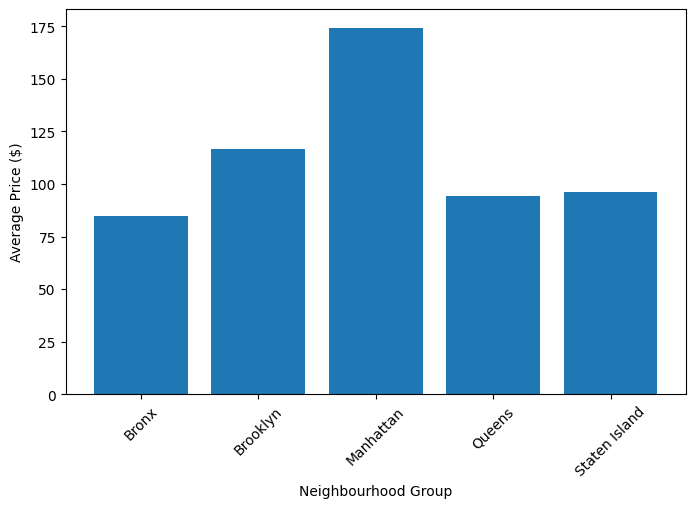

In [77]:
# Let's take a look at the average prices on a bar chart
# Create bar chart
avg_prices = data.groupby('neighbourhood_group')['price'].mean()

plt.figure(figsize=(8, 5))
plt.bar(avg_prices.index, avg_prices.values)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

### 4. Data Analysis according to business question

This part should include:


*   Correlation Matrix to analyse how prices and locations correlate
*   Some insights into the price strucutre (median, range etc. per area)
*   NYC heat map that shows the listings as well as prices per area. We could plot the results on to the NYC map and colorcode them by price for example. The map was available together with the dataset.


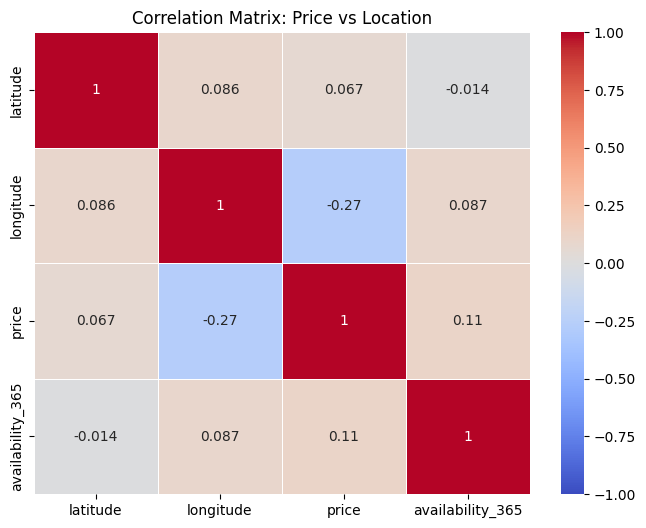

In [78]:
# Produce a Correlation Matrix

corr_matrix = data[['latitude', 'longitude', 'price', 'availability_365']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix: Price vs Location')
plt.show()

Median Price per Neighbourhood Group:
neighbourhood_group
Bronx             65.0
Brooklyn          90.0
Manhattan        149.0
Queens            75.0
Staten Island     75.0
Name: price, dtype: float64


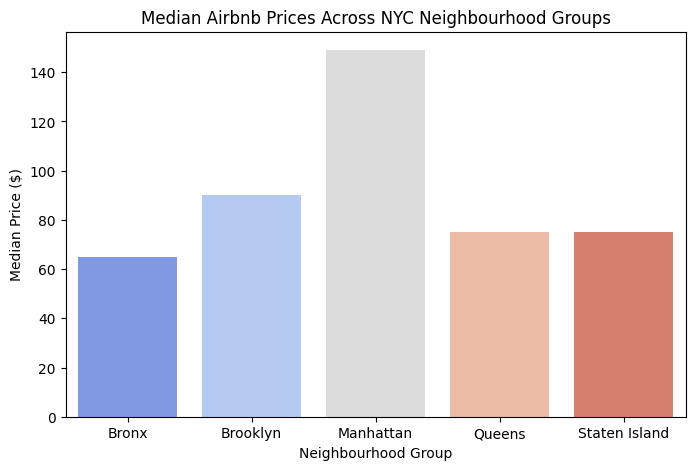

In [79]:
# Median Price per Neighbourhood

# Grouping data by neighbourhood and calculating price statistics
price_stats = data.groupby("neighbourhood_group")["price"].describe()

# Display the price summary per area

# Calculate the median price per neighbourhood group
median_prices = data.groupby("neighbourhood_group")["price"].median()

# Display the calculated median prices
print("Median Price per Neighbourhood Group:")
print(median_prices)

# Plot the median price per neighbourhood group
plt.figure(figsize=(8, 5))
sns.barplot(x=median_prices.index, y=median_prices.values, hue=median_prices.index, palette="coolwarm", legend=False)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Median Price ($)")
plt.title("Median Airbnb Prices Across NYC Neighbourhood Groups")
plt.show()

  neighbourhood_group      neighbourhood  total_listings  median_price  \
0               Bronx           Allerton              41          63.0   
1               Bronx         Baychester               7          75.0   
2               Bronx            Belmont              24          52.5   
3               Bronx          Bronxdale              19          50.0   
4               Bronx        Castle Hill               9          39.0   
5               Bronx        City Island              17          95.0   
6               Bronx  Claremont Village              24          63.5   
7               Bronx       Clason Point              21          80.0   
8               Bronx         Co-op City               2          77.5   
9               Bronx          Concourse              50          81.0   

    avg_price  avg_availability  avg_reviews  
0   86.682927        159.195122    37.365854  
1   75.428571        157.857143    44.285714  
2   77.125000        187.666667    12.333333

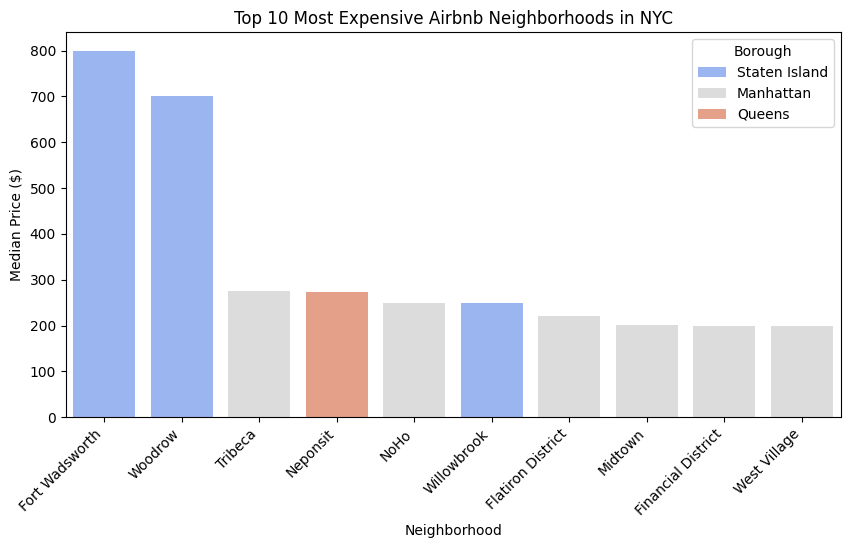

In [80]:
# Neighborouhood specific analysis

# Extracting neighborhood-level statistics
neighborhood_stats = data.groupby(["neighbourhood_group", "neighbourhood"]).agg(
    total_listings=("id", "count"),
    median_price=("price", "median"),
    avg_price=("price", "mean"),
    avg_availability=("availability_365", "mean"),
    avg_reviews=("number_of_reviews", "mean")
).reset_index()

# Display neighborhood-level data insights
print(neighborhood_stats.head(10))

# Visualization: Top 10 Most Expensive Neighborhoods
top_expensive_neighborhoods = neighborhood_stats.sort_values(by="median_price", ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_expensive_neighborhoods["neighbourhood"],
    y=top_expensive_neighborhoods["median_price"],
    hue=top_expensive_neighborhoods["neighbourhood_group"],
    palette="coolwarm"
)
plt.xlabel("Neighborhood")
plt.ylabel("Median Price ($)")
plt.title("Top 10 Most Expensive Airbnb Neighborhoods in NYC")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Borough")
plt.show()

In [81]:
# Map showing price and availability composite (heat higher where price and availability are higher - heat lower when price and availability are lower)
# Remove non-numeric price values
data["price"] = pd.to_numeric(data["price"], errors="coerce")
data["availability_365"] = pd.to_numeric(data["availability_365"], errors="coerce")

# Normalize price and availability to a 0-1 range
data["price_norm"] = (data["price"] - data["price"].min()) / (data["price"].max() - data["price"].min())
data["availability_norm"] = (data["availability_365"] - data["availability_365"].min()) / (data["availability_365"].max() - data["availability_365"].min())

# Multiply normalized price with normalized availabillity to see where both peak
data["composite"] = data["price_norm"] * data["availability_norm"]

# Prepare heatmap data: (latitude, longitude, composite intensity)
heat_data = list(zip(data["latitude"], data["longitude"], data["composite"]))

# Create NYC map
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add heatmap layer using the composite metric
HeatMap(heat_data, radius=8).add_to(nyc_map)

# Save and display the map
nyc_map.save("nyc_price_availability_heatmap.html")
nyc_map

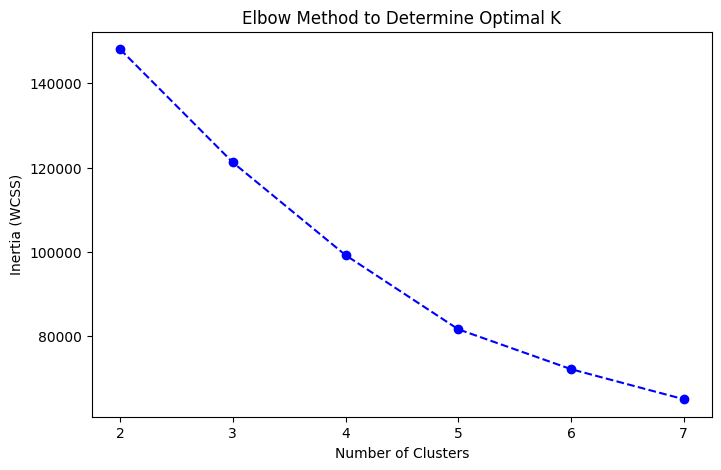

 K-Means Clustering Completed! Assigned Cluster Labels.
   cluster   avg_price  avg_availability  count_listings
0        0  101.097141        285.884337            9934
1        1   96.669265         64.146268           10262
2        2  105.128116         27.472823           19373
3        3  292.645144        154.422807            7682


In [82]:
# Using the K-Means identify Popular Bookin Clusters in NYC Airbnb listings

# Select relevant features
data = data[["latitude", "longitude", "availability_365", "price"]].dropna()

# Remove extreme price outliers (Top 1%)
data = data[data["price"] < data["price"].quantile(0.99)]

# Normalize the features for clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[["latitude", "longitude", "availability_365", "price"]])

# Choose optimal number of clusters using Elbow Method
inertia = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Graph to visualise the clusters effectivences

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o", linestyle="--", color="blue")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method to Determine Optimal K")
plt.show()

# Fit K-Means with optimal clusters (based on elbow method)
optimal_k = 4  # Choose the best k from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data["cluster"] = kmeans.fit_predict(data_scaled)

print(" K-Means Clustering Completed! Assigned Cluster Labels.")

# The Elbow Method is used to identify the optimal number of clusters by plotting the within-cluster sum of squares (WCSS, or inertia) against the number of clusters.
# The optimal cluster count is typically at the point where the inertia reduction significantly slows down (the "elbow").
# Optimal number of clusters is 4 k=4

# Interpretation of the Cluster Characteristics
# Group by cluster and compute statistics
cluster_stats = data.groupby("cluster").agg(
    avg_price=("price", "mean"),
    avg_availability=("availability_365", "mean"),
    count_listings=("cluster", "count")
).reset_index()

# Display the summary
print(cluster_stats)

In [83]:
# Create the NYC clustering map
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Define cluster colors
cluster_colors = {0: "red", 1: "blue", 2: "green", 3: "purple"}
cluster_labels = {
    0: "Budget-Friendly, High Demand",
    1: "Luxury Listings, Low Demand",
    2: "Mid-Range, Balanced Demand",
    3: "Low-Demand Areas"
}

# Add clusters to map
for _, row in data.iterrows():
    cluster_idx = int(row["cluster"])  # Convert float to integer
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=3,
        color=cluster_colors[cluster_idx],
        fill=True,
        fill_color=cluster_colors[cluster_idx],
        fill_opacity=0.6
    ).add_to(nyc_map)

# Add Floating Legend as a Marker (Top-Right Position)
legend_html = """
<div style="
    position: fixed;
    bottom: 20px; left: 20px;
    width: 250px;
    height: 150px;
    background-color: white;
    z-index: 9999;
    padding: 10px;
    border-radius: 5px;
    border: 2px solid grey;
    font-size: 14px;
    opacity: 0.9;">
    <b>NYC Airbnb Clusters</b><br>
    <div style='background:red; width:20px; height:20px; display:inline-block;'></div> Budget-Friendly, High Demand<br>
    <div style='background:blue; width:20px; height:20px; display:inline-block;'></div> Luxury Listings, Low Demand<br>
    <div style='background:green; width:20px; height:20px; display:inline-block;'></div> Mid-Range, Balanced Demand<br>
    <div style='background:purple; width:20px; height:20px; display:inline-block;'></div> Low-Demand Areas<br>
</div>
"""

# Attach the legend as a Marker at a fixed location in NYC
legend = folium.Marker(
    location=[40.85, -73.85],  # Top-right position in NYC
    icon=DivIcon(html=legend_html)
).add_to(nyc_map)

# Save and display the map
nyc_map.save("nyc_airbnb_clusters.html")
nyc_map

Output hidden; open in https://colab.research.google.com to view.

### References

Kaggle. (2019) AB_NYC_2019 [Dataset]. Available at: https://www.kaggle.com/code/whyalwaysme/ab-nyc-2019 (Accessed: 15 February 2025).

Airbnb. (2025a) About Airbnb: What it is and how it works. Available from: https://www.airbnb.com/help/article/2503 (Accessed: 15 February 2025).

Airbnb. (2025b) How much does Airbnb charge hosts? Available from: https://www.airbnb.com/resources/hosting-homes/a/how-much-does-airbnb-charge-hosts-288 (Accessed: 15 February 2025).